In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [179]:
from sklearn.model_selection import GridSearchCV

In [180]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [181]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [182]:
x = data[['X_1', 'X_2']]
y = data.Y

In [183]:
clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 181.2, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(83.7, 108.72, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

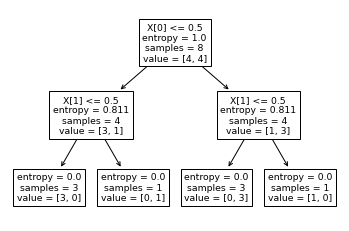

In [184]:
tree.plot_tree(clf.fit(x,y))

In [185]:
titanic_data = pd.read_csv("/Users/cram/Downloads/train.csv")

In [186]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [188]:
x = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
y = titanic_data.Survived

In [189]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [190]:
x = pd.get_dummies(x)

In [191]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [192]:
x = x.fillna({'Age' : x.Age.median()})

In [193]:
clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 190.26, 'X[6] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(83.7, 135.9, 'X[0] <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(41.85, 81.53999999999999, 'X[4] <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(20.925, 27.180000000000007, '\n  (...)  \n'),
 Text(62.775000000000006, 27.180000000000007, '\n  (...)  \n'),
 Text(125.55000000000001, 81.53999999999999, 'X[4] <= 23.35\nentropy = 1.0\nsamples = 144\nvalue = [72, 72]'),
 Text(104.625, 27.180000000000007, '\n  (...)  \n'),
 Text(146.475, 27.180000000000007, '\n  (...)  \n'),
 Text(251.10000000000002, 135.9, 'X[4] <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(188.32500000000002, 27.180000000000007, '\n  (...)  \n'),
 Text(230.175, 27.180000000000007, '\n  (...)  \n'),
 Text(292.95, 81.53999999999999, 'X[2] <= 2.5\nentropy = 0.924\nsampl

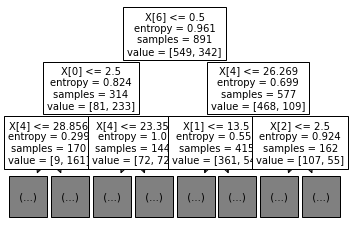

In [194]:
 tree.plot_tree(clf.fit(x,y), max_depth=2, fontsize=10)

In [195]:
from sklearn.model_selection import train_test_split

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [154]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,1,0,0,0,1
270,1,28.0,0,0,31.0000,0,1,0,0,1
860,3,41.0,2,0,14.1083,0,1,0,0,1
435,1,14.0,1,2,120.0000,1,0,0,0,1


In [155]:
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
709,3,28.0,1,1,15.2458,0,1,1,0,0
439,2,31.0,0,0,10.5000,0,1,0,0,1
840,3,20.0,0,0,7.9250,0,1,0,0,1
720,2,6.0,0,1,33.0000,1,0,0,0,1
39,3,14.0,1,0,11.2417,1,0,1,0,0


In [156]:
clf.score(x,y) #число правильных ответов

0.9797979797979798

In [157]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [158]:
clf.score(x_train,y_train)

0.9798657718120806

In [159]:
clf.score(x_test,y_test)

0.7661016949152543

In [160]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy' , max_depth=5)

In [161]:
max_depth_scores = range(1,100)

In [162]:
scores_data = pd.DataFrame()

In [163]:
for max_depth in max_depth_scores:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    mean_cross_val_score = cross_val_score(clf, x_train, y_train, cv = 5).mean()
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [104]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score','cross_val_score'],
                          var_name='set_type', value_name='score' )

In [105]:
scores_data_long.query('set_type == "cross_val_score"')

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.800392
...,...,...,...
292,95,cross_val_score,0.765140
293,96,cross_val_score,0.768515
294,97,cross_val_score,0.763459
295,98,cross_val_score,0.776905


<AxesSubplot:xlabel='max_depth', ylabel='score'>

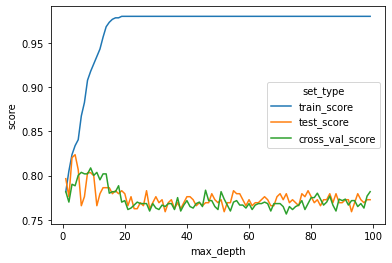

In [106]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [108]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

In [109]:
cross_val_score(best_clf, x_test, y_test, cv = 5).mean()

0.8271186440677966

In [110]:
df_train = pd.read_csv("/Users/cram/Downloads/train_iris.csv", index_col=0)
df_test = pd.read_csv("/Users/cram/Downloads/test_iris.csv", index_col=0)

In [111]:
x_train = df_train.drop(['sepal length','sepal width','petal length','petal width','species'], axis=1)
x_test = df_test.drop(['sepal length','sepal width','petal length','petal width','species'], axis=1)
y = df_train.species
y = df_test.species

In [120]:
new_scores_data = pd.DataFrame()

In [121]:
clf =tree.DecisionTreeClassifier()

In [174]:
parametrs = {'criterion':['gini','entropy'], 'max_depth' : range(1,5)}

In [175]:
grid_search_cv_clf=GridSearchCV(clf, parametrs, cv = 5)

In [176]:
grid_search_cv_clf

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_depth=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5)})

In [171]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 3}